In [7]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('heart_failure_clinical_records_dataset.xlsx', engine='openpyxl')

In [3]:
# split the data into train and test sets
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Test 1 

---
Halve the neurons from 192 to 96

---
#### Results 
Loss is:  382.7286376953125 significantly larger number <br>
Accuracy is:  0.6166666746139526  Less Accurate by 10% <br><br>

Accuracy Graph: Erratic, Not learning. <br>
Loss Graph: More Erratic <br><br>

True Positives: 0 <br>
True Negatives: 37<br><br>

False Positives: 23 <br>
False Negatives: 0 <br><br>

---

#### Conclusion
Results are worse. 

Epoch 1/100


2022-11-17 21:36:16.755080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 1s 52ms/step - loss: 5796.6904 - accuracy: 0.2750 - val_loss: 210.3516 - val_accuracy: 0.6329
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 909.4123 - accuracy: 0.7250 - val_loss: 2320.8506 - val_accuracy: 0.6329
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1783.6364 - accuracy: 0.7250 - val_loss: 2149.6860 - val_accuracy: 0.6329
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 1215.0071 - accuracy: 0.7250 - val_loss: 645.3033 - val_accuracy: 0.6329
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 595.4626 - accuracy: 0.4500 - val_loss: 338.2484 - val_accuracy: 0.3671
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 315.3576 - accuracy: 0.6375 - val_loss: 624.8821 - val_accuracy: 0.6329
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 346.3017 - accuracy: 0.7250 - val_loss: 31.5591 - val_accuracy: 0.3671
Epoch 

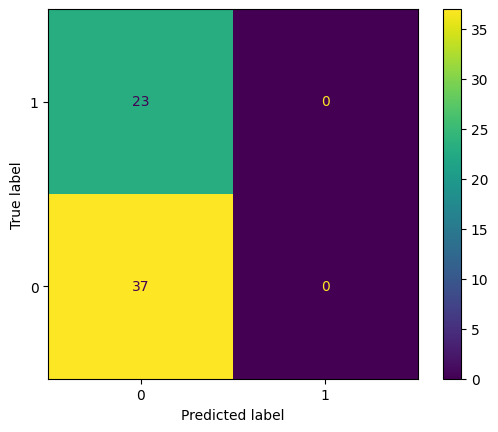

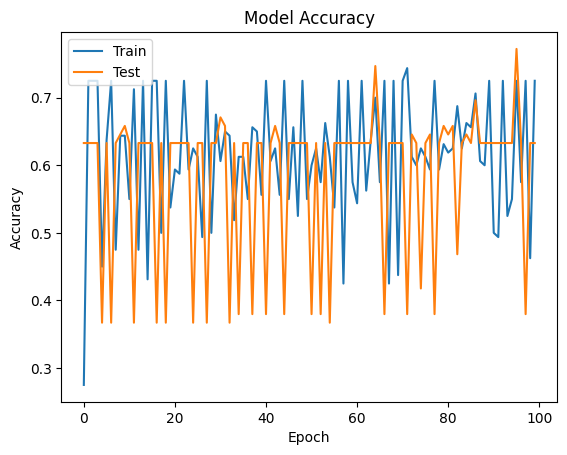

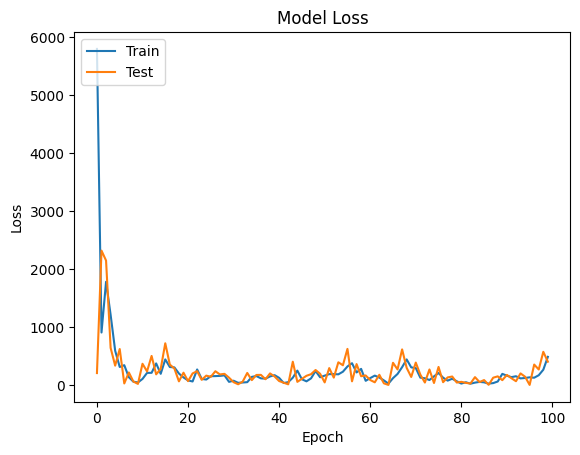

In [4]:
# input dimension which is essentially the number of columns in the X_train dataset
inp_dim = len(X_train.columns)

# a random neuron number which is how wide the dataset is. I multiplied the input dimension by 16. 
neurons = 96
# epochs is the number of times the model will run through the dataset with the aim of getting more accurate every time
# running it to many times can cause overfitting
epochs = 100 
# this will create a sequetial model which is a linear stack of layers
model = Sequential() 

# this will add the first layer to the model called the activation layer
model.add(Dense(neurons, input_dim=inp_dim, activation='relu'))
# this next layer is an output layer, there are no hidden layers in this model
model.add(Dense(1, activation='sigmoid'))
# next we compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the training data
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.33)

# make predictions
predictions = model.predict(X_test)
# for prediction greater than 0.5 we will round up to 1 the rest will be rounded down to 0
predictions = (predictions > 0.5)*1
# capture the output of the model in a dataframe
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
# write the outputs to a CSV file
output.to_csv('output.csv', index=False)

# evalute the model and print them out to see how well we did 
# return the loss value and metrics values for the model in test mode

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss is: ', loss)
print('Accuracy is: ', accuracy)

cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

# plot accuracy results at every epochs 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the loss at every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Test 2 

---
Halve the epochs from 100 to 50

---
#### Results
Loss is:  178.3766326904297 <br>
Accuracy is:  0.6166666746139526 <br><br>

Accuracy Graph: Slightly less erratic<br>
Loss Graph: Slightly less erratic<br><br>

True Positives: 0<br>
True Negatives: 37<br><br>

False Positives: 23<br>
False Negatives: 0<br><br>

---

#### Conclusion
Slight improvment on the learning however the results are still poor. 

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 1s 45ms/step - loss: 13041.2881 - accuracy: 0.2750 - val_loss: 2314.7058 - val_accuracy: 0.3671
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 1528.5790 - accuracy: 0.6375 - val_loss: 3611.8940 - val_accuracy: 0.6329
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 2980.2827 - accuracy: 0.7250 - val_loss: 4105.7778 - val_accuracy: 0.6329
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 2674.6067 - accuracy: 0.7250 - val_loss: 2396.3445 - val_accuracy: 0.6329
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1092.3014 - accuracy: 0.6187 - val_loss: 590.9268 - val_accuracy: 0.3671
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 533.3736 - accuracy: 0.4500 - val_loss: 844.1172 - val_accuracy: 0.6329
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 598.0594 - accuracy: 0.7250 - val_loss: 352.9382 - val_accuracy: 0.6329
Epoch 

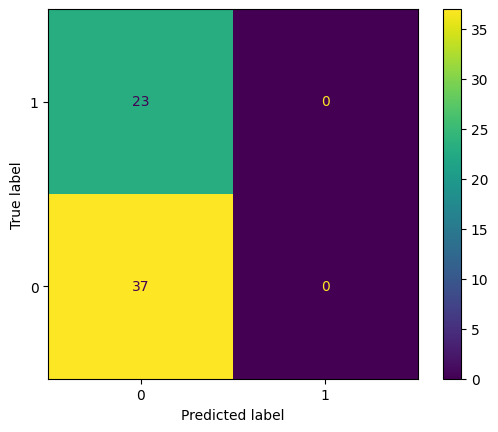

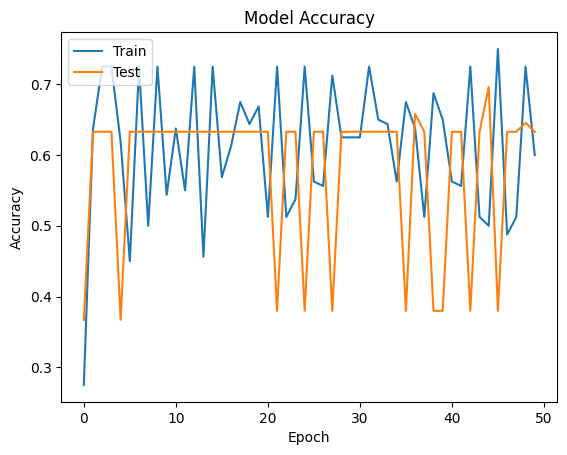

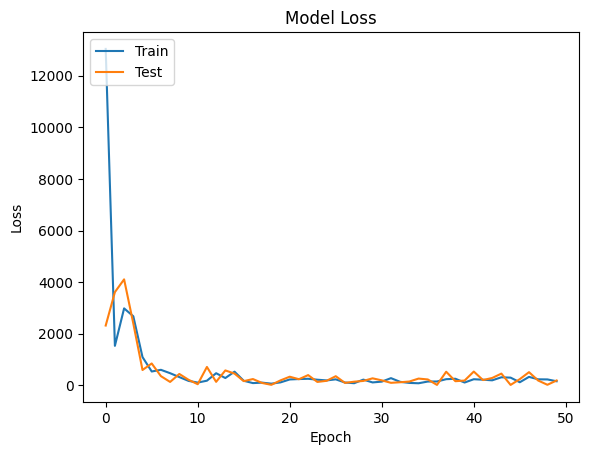

In [5]:
# input dimension which is essentially the number of columns in the X_train dataset
inp_dim = len(X_train.columns)

# a random neuron number which is how wide the dataset is. I multiplied the input dimension by 16. 
neurons = 192
# epochs is the number of times the model will run through the dataset with the aim of getting more accurate every time
# running it to many times can cause overfitting
epochs = 50
# this will create a sequetial model which is a linear stack of layers
model = Sequential() 

# this will add the first layer to the model called the activation layer
model.add(Dense(neurons, input_dim=inp_dim, activation='relu'))
# this next layer is an output layer, there are no hidden layers in this model
model.add(Dense(1, activation='sigmoid'))
# next we compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the training data
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.33)

# make predictions
predictions = model.predict(X_test)
# for prediction greater than 0.5 we will round up to 1 the rest will be rounded down to 0
predictions = (predictions > 0.5)*1
# capture the output of the model in a dataframe
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
# write the outputs to a CSV file
output.to_csv('output.csv', index=False)

# evalute the model and print them out to see how well we did 
# return the loss value and metrics values for the model in test mode

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss is: ', loss)
print('Accuracy is: ', accuracy)

cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

# plot accuracy results at every epochs 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the loss at every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Test 3 

---
Halve the epochs from 100 to 50 <br>
Increase the neurons from 192 to 288

---
#### Results
Loss is:  29.986194610595703 <br>
Accuracy is:  0.6166666746139526   <br><br>

Accuracy Graph: Erratic<br>
Loss Graph: Very erratic<br><br>

True Positives: 3<br>
True Negatives: 34<br><br>

False Positives: 20<br>
False Negatives: 3<br><br>

---

#### Conclusion
The first attempt remains the most accurate however it still is not learning. 

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 1s 45ms/step - loss: 1237.7760 - accuracy: 0.6500 - val_loss: 817.3766 - val_accuracy: 0.6329
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 246.2741 - accuracy: 0.5875 - val_loss: 670.8633 - val_accuracy: 0.6329
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 367.3739 - accuracy: 0.6875 - val_loss: 319.2264 - val_accuracy: 0.3671
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 461.8481 - accuracy: 0.6125 - val_loss: 340.4789 - val_accuracy: 0.6329
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 550.7313 - accuracy: 0.4375 - val_loss: 640.3707 - val_accuracy: 0.6329
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 949.7041 - accuracy: 0.7250 - val_loss: 1578.1229 - val_accuracy: 0.6329
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 777.7144 - accuracy: 0.6313 - val_loss: 326.4041 - val_accuracy: 0.3671
Epoch 8/50
5/5

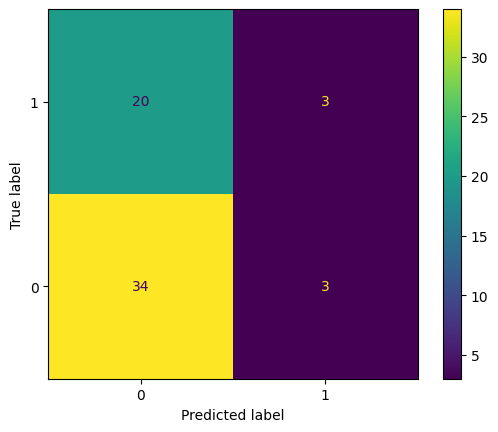

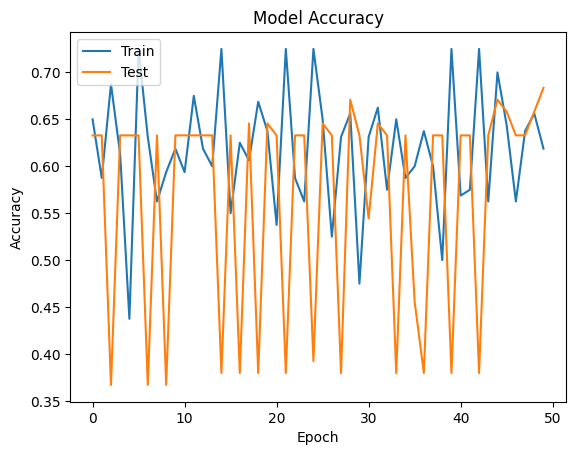

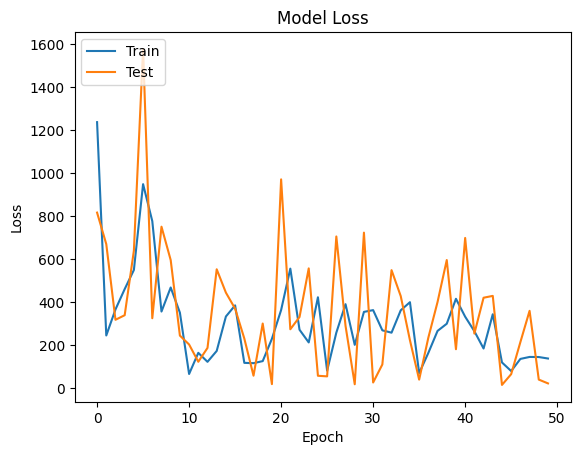

In [6]:
# input dimension which is essentially the number of columns in the X_train dataset
inp_dim = len(X_train.columns)

# a random neuron number which is how wide the dataset is. I multiplied the input dimension by 16. 
neurons = 288
# epochs is the number of times the model will run through the dataset with the aim of getting more accurate every time
# running it to many times can cause overfitting
epochs = 50
# this will create a sequetial model which is a linear stack of layers
model = Sequential() 

# this will add the first layer to the model called the activation layer
model.add(Dense(neurons, input_dim=inp_dim, activation='relu'))
# this next layer is an output layer, there are no hidden layers in this model
model.add(Dense(1, activation='sigmoid'))
# next we compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the training data
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.33)

# make predictions
predictions = model.predict(X_test)
# for prediction greater than 0.5 we will round up to 1 the rest will be rounded down to 0
predictions = (predictions > 0.5)*1
# capture the output of the model in a dataframe
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
# write the outputs to a CSV file
output.to_csv('output.csv', index=False)

# evalute the model and print them out to see how well we did 
# return the loss value and metrics values for the model in test mode

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss is: ', loss)
print('Accuracy is: ', accuracy)

cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

# plot accuracy results at every epochs 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the loss at every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Test 4 

---
Standardise the data to be between 0 and 1 <br>
Use all the original settings.

---
#### Results
Loss is:  0.527 <br>
Accuracy is:  0.800    <br><br>

Accuracy Graph: Actually learning still a bit erratic <br>
Loss Graph: Much Smoother decline <br><br>

True Positives: 11 <br>
True Negatives: 37 <br><br>

False Positives: 12 <br>
False Negatives: 0 <br><br>

---

#### Conclusion
Best results so far. So equalising all the data worked well here probably due to the chosen parameters in the model as well. 

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
# normalise the data to a range of 0 to 1

columns_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
# create a variable to hold the new columns that will contain the scaled values
normalised_columns = ['Norm_' + col for col in columns_to_scale]
# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the training data
scaler.fit(df[columns_to_scale])
# transform the data
df[normalised_columns] = scaler.transform(df[columns_to_scale])

# fit the scaler to the testing data
scaler.fit(df[columns_to_scale])
# transform the data
df[normalised_columns] = scaler.transform(df[columns_to_scale])




In [11]:
# drop the other columns
df.drop(columns_to_scale, axis=1, inplace=True)

In [12]:
df.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,Norm_age,Norm_creatinine_phosphokinase,Norm_ejection_fraction,Norm_platelets,Norm_serum_creatinine,Norm_serum_sodium,Norm_time
0,0,0,1,1,0,1,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0,0,0,1,0,1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0,0,0,1,1,1,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,1,0,0,1,0,1,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,1,1,0,0,0,1,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


In [13]:
# split the data into train and test sets
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 1s 46ms/step - loss: 0.6506 - accuracy: 0.6875 - val_loss: 0.6576 - val_accuracy: 0.6329
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6162 - accuracy: 0.7250 - val_loss: 0.6524 - val_accuracy: 0.6329
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5953 - accuracy: 0.7250 - val_loss: 0.6522 - val_accuracy: 0.6329
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5830 - accuracy: 0.7250 - val_loss: 0.6546 - val_accuracy: 0.6329
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5722 - accuracy: 0.7250 - val_loss: 0.6531 - val_accuracy: 0.6329
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5627 - accuracy: 0.7250 - val_loss: 0.6490 - val_accuracy: 0.6329
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5537 - accuracy: 0.7250 - val_loss: 0.6443 - val_accuracy: 0.6329
Epoch 8/100
5/5 [=====================

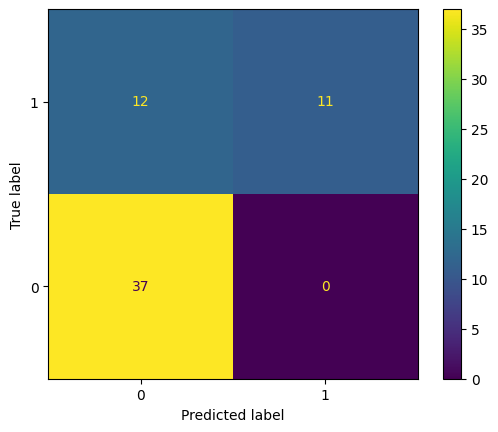

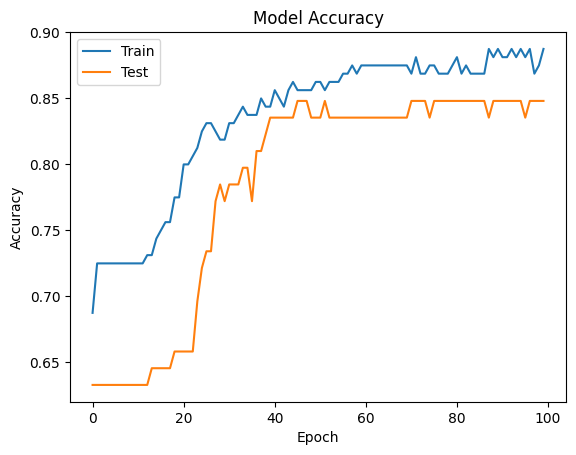

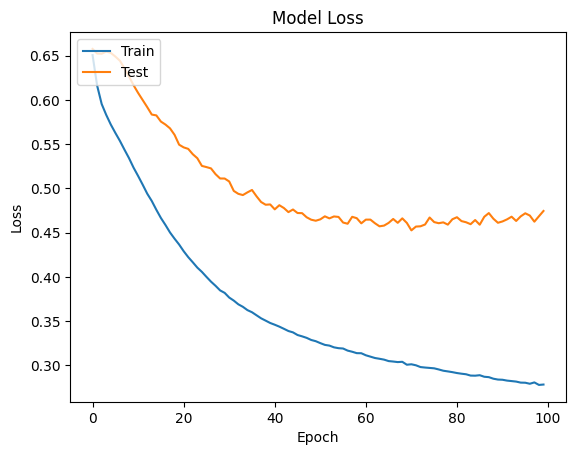

In [14]:
# input dimension which is essentially the number of columns in the X_train dataset
inp_dim = len(X_train.columns)

# a random neuron number which is how wide the dataset is. I multiplied the input dimension by 16. 
neurons = 192
# epochs is the number of times the model will run through the dataset with the aim of getting more accurate every time
# running it to many times can cause overfitting
epochs = 100
# this will create a sequetial model which is a linear stack of layers
model = Sequential() 

# this will add the first layer to the model called the activation layer
model.add(Dense(neurons, input_dim=inp_dim, activation='relu'))
# this next layer is an output layer, there are no hidden layers in this model
model.add(Dense(1, activation='sigmoid'))
# next we compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the training data
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.33)

# make predictions
predictions = model.predict(X_test)
# for prediction greater than 0.5 we will round up to 1 the rest will be rounded down to 0
predictions = (predictions > 0.5)*1
# capture the output of the model in a dataframe
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
# write the outputs to a CSV file
output.to_csv('output.csv', index=False)

# evalute the model and print them out to see how well we did 
# return the loss value and metrics values for the model in test mode

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss is: ', loss)
print('Accuracy is: ', accuracy)

cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

# plot accuracy results at every epochs 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the loss at every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()